In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.regularizers import l2
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

2025-04-14 10:26:11.824237: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 10:26:11.844656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-14 10:26:11.864553: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-14 10:26:11.869826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-14 10:26:11.884872: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_ds,val_ds=image_dataset_from_directory(
    directory='/mnt/c/Users/91940/projects/dl/Deep Learning/CNN/cats_and_dogs_filtered/cats_and_dogs_filtered/train',batch_size=32,labels='inferred',label_mode='categorical',validation_split=0.2,seed=50,image_size=(256,256),subset='both'
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


I0000 00:00:1744606579.830668  183972 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744606579.884312  183972 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744606579.884371  183972 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744606579.891074  183972 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1744606579.891128  183972 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [3]:
test_ds=image_dataset_from_directory(
    directory='/mnt/c/Users/91940/projects/dl/Deep Learning/CNN/cats_and_dogs_filtered/cats_and_dogs_filtered/validation',
    batch_size=32,
    labels='inferred',
    label_mode='categorical',
    seed=50,image_size=(256,256)
)

Found 1000 files belonging to 2 classes.


In [5]:
cnn=Sequential([
    Input(shape=(256,256,3)),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu',strides=(2,2)),
    keras.layers.MaxPooling2D(strides=(2,2)),
    keras.layers.Conv2D(32,kernel_size=(5,5),activation='relu',strides=(1,1)),
    keras.layers.MaxPooling2D(strides=(2,2)),
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',strides=(1,1)),
          keras.layers.Flatten(),
          keras.layers.Dense(100,activation='relu',kernel_regularizer=l2()),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(2,activation='softmax')
])

In [6]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
his=cnn.fit(train_ds,validation_data=val_ds,epochs=30)

Epoch 1/30


I0000 00:00:1744605974.067549  179973 service.cc:146] XLA service 0x7fb7a0003710 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744605974.067642  179973 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-04-14 10:16:14.266829: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-14 10:16:14.588134: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 2/50 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.4922 - loss: 2.6757s: 2.6296  

I0000 00:00:1744605984.969857  179973 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - accuracy: 0.4987 - loss: 1.6247 - val_accuracy: 0.5075 - val_loss: 0.7875
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4925 - loss: 0.7546 - val_accuracy: 0.4975 - val_loss: 0.7089
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4941 - loss: 0.7085 - val_accuracy: 0.5300 - val_loss: 0.6896
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5254 - loss: 0.6964 - val_accuracy: 0.5075 - val_loss: 0.6966
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4892 - loss: 0.6959 - val_accuracy: 0.5075 - val_loss: 0.6934
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.4982 - loss: 0.6937 - val_accuracy: 0.5075 - val_loss: 0.6938
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5077 - loss: 0.6943 - val_accuracy: 0.5100 - val_loss: 0.6940
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5090 - loss: 0.6935 - val_accuracy: 0.4975 - val_loss: 

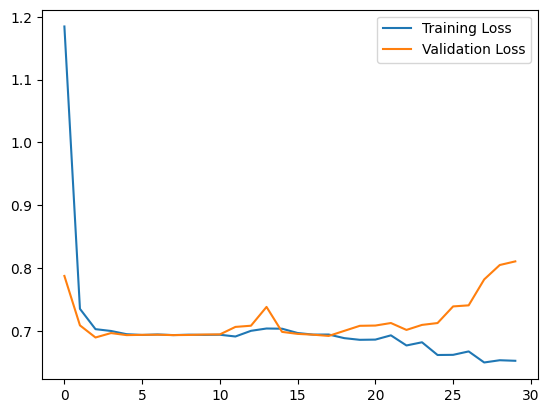

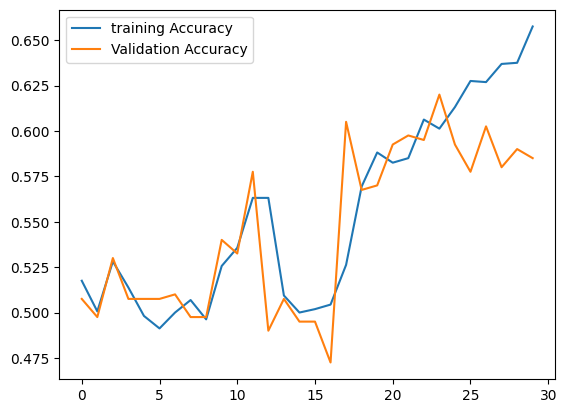

In [8]:
plt.plot(his.history['loss'],label='Training Loss')
plt.plot(his.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

plt.plot(his.history['accuracy'],label='training Accuracy')
plt.plot(his.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [4]:
cnn1=Sequential([
    Input(shape=(256,256,3)),
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(512,kernel_size=(7,7),activation='relu',strides=(2,2)),
    keras.layers.MaxPooling2D(strides=(2,2)),
    keras.layers.Conv2D(256,kernel_size=(5,5),activation='relu',strides=(1,1)),
    keras.layers.MaxPooling2D(strides=(2,2)),
    keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',strides=(1,1)),
    keras.layers.MaxPooling2D(strides=(2,2)),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',strides=(1,1)),
          keras.layers.Flatten(),
          keras.layers.Dense(200,activation='relu',kernel_regularizer=l2()),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(150,activation='relu',kernel_regularizer=l2()),
          keras.layers.Dropout(0.5),
          keras.layers.Dense(50,activation='relu',kernel_regularizer=l2()),
          keras.layers.Dropout(0.5), 
          keras.layers.Dense(2,activation='softmax')
])

In [5]:
cnn1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
his1=cnn1.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50


I0000 00:00:1744606638.496539  184608 service.cc:146] XLA service 0x7f88500052f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744606638.496607  184608 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-04-14 10:27:18.613726: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-14 10:27:18.944418: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-04-14 10:27:24.203594: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,512,125,125]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,256,256]{3,2,1,0}, f32[512,3,7,7]{3,2,1,0}, f32[512]{0}), window={size=7x7 stride=2x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queu

49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.5112 - loss: 4.8172

2025-04-14 10:29:24.193602: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng33{k2=2,k6=2,k13=1,k14=0,k22=0} for conv (f32[32,256,58,58]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,512,62,62]{3,2,1,0}, f32[256,512,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2025-04-14 10:29:25.741292: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.547841178s
Trying algorithm eng33{k2=2,k6=2,k13=1,k14=0,k22=0} for conv (f32[32,256,58,58]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,512,62,62]{3,2,1,0}, f32[256,512,5,5]{3,2,1,0}, f32[256]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convB

50/50 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.5098 - loss: 4.7776 - val_accuracy: 0.5075 - val_loss: 2.2444
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 485ms/step - accuracy: 0.4981 - loss: 1.9462 - val_accuracy: 0.5075 - val_loss: 1.3373
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 478ms/step - accuracy: 0.4708 - loss: 1.2274 - val_accuracy: 0.4925 - val_loss: 0.9928
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 484ms/step - accuracy: 0.4685 - loss: 0.9483 - val_accuracy: 0.4925 - val_loss: 0.8482
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 470ms/step - accuracy: 0.5297 - loss: 0.8274 - val_accuracy: 0.4925 - val_loss: 0.7805
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.4735 - loss: 0.7710 - val_accuracy: 0.4925 - val_loss: 0.7456
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.4890 - loss: 0.7400 - val_accuracy: 0.4925 - val_loss: 0.7260
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - accuracy: 0.4764 - loss: 0.7228 - val_accuracy: 0.4925 

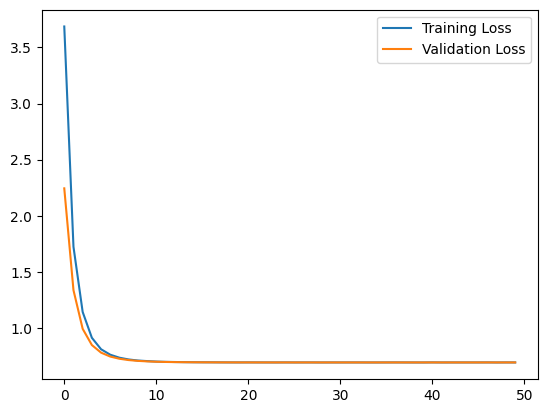

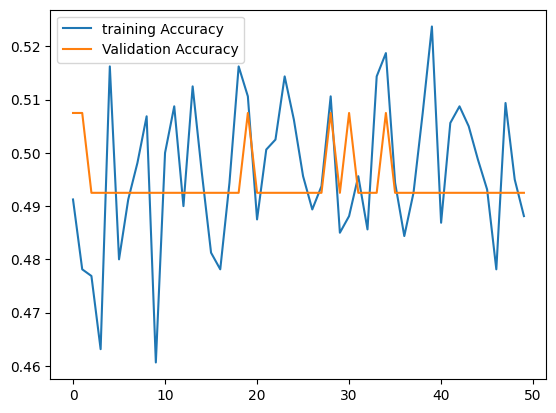

In [7]:
plt.plot(his1.history['loss'],label='Training Loss')
plt.plot(his1.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

plt.plot(his1.history['accuracy'],label='training Accuracy')
plt.plot(his1.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()